# Time irreversibility of symbolic time series: A cautionary tale

Lluis Arola-Fernandez and Lucas Lacasa

May 2023 

Paper: https://arxiv.org/pdf/2303.11868.pdf


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats



Some useful functions

#### A function to enumerate all possible words of length m and their occurrence in two binary time series

In [3]:
def count_blocks_two(binary_string1, binary_string2, m):
    """
    Count the frequency of each block of size m in two binary strings.

    Args:
        binary_string1 (str): The first binary string.
        binary_string2 (str): The second binary string.
        m (int): The size of the block.

    Returns:
        dict: A dictionary where the keys are the blocks of size m and the
              values are their frequency of occurrence in the binary strings.
    """
    blocks1 = {}
    n1 = len(binary_string1)
    for i in range(n1 - m + 1):
        block = binary_string1[i:i+m]
        if block in blocks1:
            blocks1[block] += 1
        else:
            blocks1[block] = 1
    all_blocks = {}
    for i in range(2**m):
        block = format(i, f"0{m}b")
        if block not in blocks1:
            all_blocks[block] = 0
    all_blocks.update(blocks1)
    sorted_blocks1 = dict(sorted(all_blocks.items()))
    
    blocks2 = {}
    n2 = len(binary_string2)
    for i in range(n2 - m + 1):
        block = binary_string2[i:i+m]
        if block in blocks2:
            blocks2[block] += 1
        else:
            blocks2[block] = 1
    all_blocks = {}
    for i in range(2**m):
        block = format(i, f"0{m}b")
        if block not in blocks2:
            all_blocks[block] = 0
    all_blocks.update(blocks2)
    sorted_blocks2 = dict(sorted(all_blocks.items()))
    
    #for block, count in sorted_blocks1.items():
        #print(f"{block}: {count} {sorted_blocks2[block]}")
    return sorted_blocks1, sorted_blocks2

#### A general function when the symbolic series are not binary, i.e. the alphabet has $n$ symbols



In [4]:
def count_blocks(string1, string2, n, m):
    """
    Count the frequency of each block of size m in two strings with n symbols.

    Args:
        string1 (str): The first string.
        string2 (str): The second string.
        n (int): The number of symbols in the strings.
        m (int): The size of the block.

    Returns:
        dict: A dictionary where the keys are the blocks of size m and the
              values are their frequency of occurrence in the strings.
    """
    all_blocks = {}
    for i in range(n**m):
        block = ""
        for j in range(m):
            block = str(i % n) + block
            i //= n
        all_blocks[block] = 0
    
    blocks1 = {}
    n1 = len(string1)
    for i in range(n1 - m + 1):
        block = string1[i:i+m]
        if block in blocks1:
            blocks1[block] += 1
        else:
            blocks1[block] = 1
    
    blocks2 = {}
    n2 = len(string2)
    for i in range(n2 - m + 1):
        block = string2[i:i+m]
        if block in blocks2:
            blocks2[block] += 1
        else:
            blocks2[block] = 1
    
    all_blocks.update(blocks1)
    all_blocks.update(blocks2)
    sorted_blocks = dict(sorted(all_blocks.items()))
    
    for block, count in sorted_blocks.items():
        if block in blocks1:
            count1 = blocks1[block]
        else:
            count1 = 0
        if block in blocks2:
            count2 = blocks2[block]
        else:
            count2 = 0
        #print(f"{block}: {count1} {count2}")
    
    return sorted_blocks

#### Examples

In [5]:
string1 = "0123"
string2 = "0113"
n = 4
m = 2
count_blocks(string1, string2, n, m)

print()
string1 = "0111101010"
string2 = "0111101010"
m = 3
count_blocks_two(string1, string2, m)

print('finished...')


finished...


### Some other important functions

In [5]:
def LIST2STR(L):
    string=''
    for i in L:
        string=string+str(i)
    return string

#DYNAMICS TO GENERATE (REAL-VALUED) TIME SERIES
def log4(mu,x):
    return mu*x*(1-x)

def compute_irreversibility(L_symb_str, revL_symb_str, m):
    blocks = count_blocks_two(L_symb_str, revL_symb_str, m)
    dic1 = blocks[0]
    dic2 = blocks[1]
    IRR=0
    block_normalization = series_size - m + 1
    for i in dic1:
        IRR = IRR + (dic1[i]/block_normalization -dic2[i]/block_normalization)**2
    return np.sqrt(IRR)      


def compute_metrics(L_symb_str, revL_symb_str, m):
    
    metrics = []
    
    blocks = count_blocks_two(L_symb_str, revL_symb_str, m)
    dic1 = blocks[0]
    dic2 = blocks[1]
    IRR=0
    block_normalization = series_size - m + 1
    for i in dic1:
        IRR = IRR + (dic1[i]/block_normalization -dic2[i]/block_normalization)**2
    metrics.append(np.sqrt(IRR))
    IRR1 = 0
    IRR2 = 0
    
    for i in dic1: 
        if ((dic1[i] == 0 and dic2[i] > 0) or (dic1[i] > 0 and dic2[i] == 0)): 
            IRR1 += (dic1[i]/block_normalization -dic2[i]/block_normalization)**2
        else:
            IRR2 += (dic1[i]/block_normalization -dic2[i]/block_normalization)**2
             
    metrics.append(np.sqrt(IRR1))
    metrics.append(np.sqrt(IRR2))     
    return metrics                 

## NO-GO THEOREM FOR BINARY TIME-SERIES (Figure 2 paper) 



Text(0.5, 0, 'word length $m$')

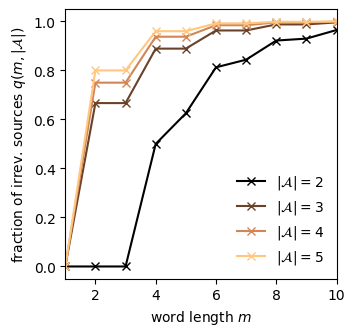

In [256]:
m_vector = [1,2,3,4,5,6,7,8,9,10]
n_vector = [2,3,4,5]

fraction = np.zeros((len(n_vector),len(m_vector)))


for mx in range(len(m_vector)):
    
    m = m_vector[mx]
    
    for nx in range(len(n_vector)): 
        
        n = n_vector[nx]
        
        if (n == 2):
            
            if ((m % 2) == 0):
                fraction[nx,mx] = 1 - 2**(-m/2)-2**(2-m)
            else: 
                fraction[nx,mx] = 1 - 2**((1-m)/2)-2**(2-m)
        else: 
            
            if ((m % 2) == 0):
                fraction[nx,mx] = 1 - n**(-m/2)
            else: 
                fraction[nx,mx] = 1 - n**((1-m)/2)
        

for mx in range(len(m_vector)):
    for nx in range(len(n_vector)):
        if (fraction[nx,mx] < 0):
            fraction[nx,mx] = 0

            
#visualization
plt.figure(figsize=(3.5,3.5))
colors = plt.cm.copper(np.linspace(0, 1, 4))
for nx in range(len(n_vector)):
    plt.plot(m_vector,fraction[nx,:], label="$|{\cal A}| = %d$"%n_vector[nx],color=colors[nx],marker='x')
plt.legend(frameon=False)
plt.xlim(1,10)
#plt.title('infinite T')
#plt.ylabel('fraction of irrev. sources $\rho(m,|{\cal{A}}|)$')
plt.ylabel('fraction of irrev. sources $q(m,|\\mathcal{A}|)$')
plt.xlabel('word length $m$')



# Heatmaps IR(mu,m) in the binarized logistic map (Figure 4 paper)

We visualize the non-monotonous behavior of the maximum value of irreversibility for the logistic map tuning both r and m.

In [33]:
m_min=1
m_max=20
num_m = 20
mu_min = 3.5
mu_max = 4.0 
num_mu = 51 # 0.01 increments between mu_min and mu_max

series_size=300000
threshold=0.5 # for partition [0,a]U[a,1], where a=threshold
print('series size:',series_size)

heatmap_IR = np.zeros((num_mu,m_max))
heatmap_frac1 = np.zeros((num_mu,m_max))
heatmap_frac2 = np.zeros((num_mu,m_max))

for my in range(num_mu):

    mu = mu_min + my*0.5/(num_mu-1)
    print(mu)
    x=np.random.random()
    L=[]
    L.append(x)
    for i in range(series_size):
        x=log4(mu,x)
        L.append(x) #forward real_value time series
    revL=L.copy()
    revL.reverse() #backward real-valued time series

    #SYMBOLIZATION
    L_symb=[]
    for i in range(series_size):
        if L[i]>threshold:
            L_symb.append(1)
        else:
            L_symb.append(0) 

    revL_symb=L_symb.copy()
    revL_symb.reverse() 

    #FROM LIST TO STRING
    L_symb_str = LIST2STR(L_symb)
    revL_symb_str = LIST2STR(revL_symb)

    for mx in range(m_min,m_max+1):
        metrics = compute_metrics(L_symb_str, revL_symb_str, mx)
        
        heatmap_IR[my][mx-1] = metrics[0]
        heatmap_frac1[my][mx-1] = metrics[1]
        heatmap_frac2[my][mx-1] = metrics[2]

series size: 300000
3.5
3.51
3.52
3.53
3.54
3.55
3.56
3.57
3.58
3.59
3.6
3.61
3.62
3.63
3.64
3.65
3.66
3.67
3.68
3.69
3.7
3.71
3.72
3.73
3.74
3.75
3.76
3.77
3.7800000000000002
3.79
3.8
3.81
3.82
3.83
3.84
3.85
3.86
3.87
3.88
3.89
3.9
3.91
3.92
3.93
3.94
3.95
3.96
3.9699999999999998
3.98
3.99
4.0


/var/folders/c5/kk81kmh50gn9bq1kf4_4mqhm0000gn/T/ipykernel_83273/2669757361.py:83: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(optimal_scatter[i, 0], optimal_scatter[i, 1], s=70, color=color, edgecolor='black', marker=marker_symbols[i])


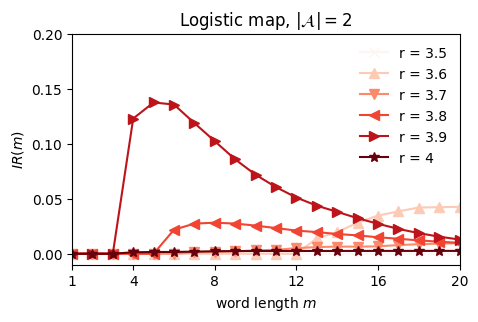

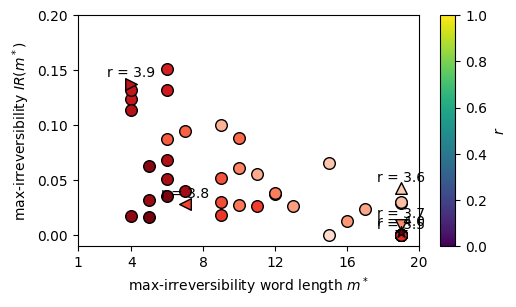

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

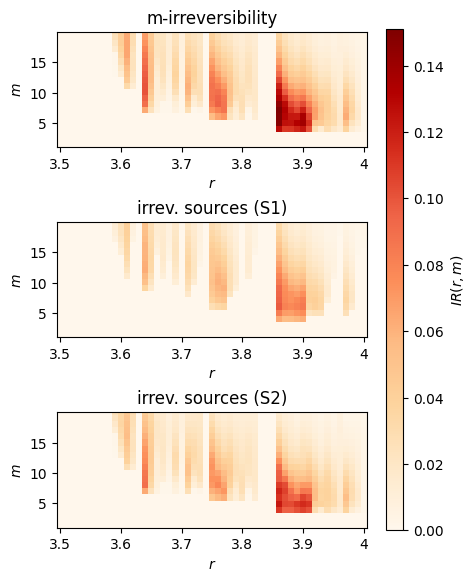

In [34]:
## FIGURE A 

optimal_scatter = np.zeros((num_mu,2))
chaotic_IR = np.zeros((num_mu,m_max))
chaotic_frac1 = np.zeros((num_mu,m_max))
chaotic_frac2 = np.zeros((num_mu,m_max))

mu_vector = np.zeros(num_mu)
for my in range(num_mu):
    mu_vector[my] = (mu_min + my*0.5/(num_mu-1))
    optimal_scatter[my,0] = np.argmax(heatmap_IR[my,:])
    optimal_scatter[my,1] = np.amax(heatmap_IR[my,:])

    
for my in range(num_mu):
    for mx in range(m_min,m_max+1):
        if (heatmap_IR[my][mx-1] < 0.20 and my != 35 and mx > 3):
            chaotic_IR[my][mx-1] = heatmap_IR[my][mx-1]
        if (heatmap_frac1[my][mx-1] < 0.20 and my != 35 and mx > 3):
            chaotic_frac1[my][mx-1] = heatmap_frac1[my][mx-1]
        if (heatmap_frac2[my][mx-1] < 0.20 and my != 35 and mx > 3):
            chaotic_frac2[my][mx-1] = heatmap_frac2[my][mx-1]
            

# set figure size
#fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4,3),gridspec_kw={'width_ratios': [0.9, 1]})

plt.figure(figsize=(5,3))

colors = plt.cm.Reds(np.linspace(0, 1, num_mu))
for my in range(num_mu):
    #if (my % 4 == 0):
    #    plt.plot(range(1, m_max+1), chaotic_IR[my, :], color=colors[my],marker='x')
    
    if (my == 0):
        plt.plot(range(1, m_max+1), chaotic_IR[my, :], color=colors[my],marker='x',label='r = 3.5',markersize=7)
        
    if (my == 10):
        plt.plot(range(1, m_max+1), chaotic_IR[my, :], color=colors[my],marker='^',label='r = 3.6',markersize=7)
        
    if (my == 20):
        plt.plot(range(1, m_max+1), chaotic_IR[my, :], color=colors[my],marker='v',label='r = 3.7',markersize=7)
        
    if (my == 30):
        plt.plot(range(1, m_max+1), chaotic_IR[my, :], color=colors[my],marker='<',label='r = 3.8',markersize=7)
        
    if (my == 40):
        plt.plot(range(1, m_max+1), chaotic_IR[my, :], color=colors[my],marker='>',label='r = 3.9',markersize=7)
    
    if (my == 50):
        plt.plot(range(1, m_max+1), chaotic_IR[my, :], color=colors[my],marker='*',label='r = 4',markersize=7)
        
plt.xlabel('word length $m$')
plt.ylabel('$IR(m)$')
plt.title('Logistic map, $|{\cal{A}}| = 2$')
plt.xlim([1,m_max])
plt.legend(frameon=False)
plt.ylim([-0.01,0.20])
xtick_pos = np.linspace(1, m_max, 6, dtype=int)
xtick_labels = [str(x) for x in xtick_pos]
plt.xticks(xtick_pos, xtick_labels)



## FIGURE B

plt.figure(figsize=(5.5,3))

#import matplotlib.pyplot as plt
#import numpy as np
from matplotlib.colors import Normalize

# Assuming 'optimal_scatter' and 'mu_vector' are numpy arrays and have same lengths.
marker_symbols = {0: 'x', 10: '^', 20: 'v', 30: '<', 40: '>', 50: '*'}  # Define markers for specific rows.

# Normalize 'mu_vector' for colormap.
norm = Normalize(vmin=mu_vector.min(), vmax=mu_vector.max())
cmap = plt.get_cmap('Reds')

for i in range(optimal_scatter.shape[0]):
    color = cmap(norm(mu_vector[i]))
    if i in marker_symbols.keys():
        plt.scatter(optimal_scatter[i, 0], optimal_scatter[i, 1], s=70, color=color, edgecolor='black', marker=marker_symbols[i])
    else:
        plt.scatter(optimal_scatter[i, 0], optimal_scatter[i, 1], s=70, color=color, edgecolor='black', marker='o')

        
plt.xlabel('max-irreversibility word length $m^*$')
plt.ylabel('max-irreversibility $IR(m^*)$')
plt.xlim([1,m_max])
plt.ylim([-0.01,0.20])
xtick_pos = np.linspace(1, m_max, 6, dtype=int)
xtick_labels = [str(x) for x in xtick_pos]
plt.xticks(xtick_pos, xtick_labels)

for i, txt in enumerate(mu_vector):
    if (i % 10 == 0):
        plt.annotate(f"r = {round(txt, 2)}", (optimal_scatter[i,0], optimal_scatter[i,1]), textcoords='offset points', xytext=(0,5), ha='center')

plt.colorbar(plt.gca().collections[0], shrink=1, aspect=15, label='$r$',cmap='Reds')
plt.show()




# FIGURES C, D, E 


fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5,7))

im_c = axs[0].imshow((np.flip(np.transpose(np.flip(np.power(chaotic_IR,1))))), cmap='OrRd', interpolation='nearest')
axs[0].set_xlabel('$r$')
axs[0].set_ylabel('$m$')
axs[0].set_ylim(0,m_max-1)
axs[0].set_title('m-irreversibility')
axs[0].set_xticks(range(0,num_mu,10))
axs[0].set_xticklabels(['3.5', '3.6', '3.7', '3.8', '3.9', '4'])
axs[0].set_yticks(range(4,15,5))
axs[0].set_yticklabels(['5', '10', '15'])
#plt.colorbar(im_c,ax=[axs[0]],shrink=0.93, aspect=20,label='$IR(r,m)$')


# Plot panel (d)
im_d = axs[1].imshow((np.flip(np.transpose(np.flip(np.power(chaotic_frac1,1))))), cmap='OrRd', interpolation='nearest', vmin=im_c.get_array().min(), vmax=im_c.get_array().max())
axs[1].set_xlabel('$r$')
axs[1].set_ylabel('$m$')
axs[1].set_ylim(0,m_max-1)
axs[1].set_title('irrev. sources (S1)')
axs[1].set_xticks(range(0,num_mu,10))
axs[1].set_xticklabels(['3.5', '3.6', '3.7', '3.8', '3.9','4'])
axs[1].set_yticks(range(4,15,5))
axs[1].set_yticklabels(['5', '10', '15'])

# Plot panel (e)
im_e = axs[2].imshow((np.flip(np.transpose(np.flip(np.power(chaotic_frac2,1))))), cmap='OrRd', interpolation='nearest', vmin=im_c.get_array().min(), vmax=im_c.get_array().max())
axs[2].set_xlabel('$r$')
axs[2].set_ylabel('$m$')
axs[2].set_ylim(0,m_max-1)
axs[2].set_title('irrev. sources (S2)')
axs[2].set_xticks(range(0,num_mu,10))
axs[2].set_xticklabels(['3.5', '3.6', '3.7', '3.8', '3.9','4'])
axs[2].set_yticks(range(4,15,5))
axs[2].set_yticklabels(['5', '10', '15'])

plt.colorbar(im_c, ax=[axs[0],axs[1],axs[2]], shrink=0.93, aspect=30, label='$IR(r,m)$', pad=0.05)

#plt.colorbar(im_e,ax=[axs[2]],shrink=0.93, aspect=20,label='$IR(r,m)$')
#plt.colorbar(im_c,ax=[axs[0],axs[1],axs[2]],shrink=0.93, aspect=20,label='$IR(r,m)$')

# Share colorbars between panels
fig.colorbar(im_c, ax=[axs[0,1], axs[1,2]])
fig.colorbar(im_c, ax=[axs[1,2], axs[2,0]])

# Adjust spacing between subplots
fig.tight_layout(pad=0.1)



# Tuning the partition threshold (Figure 5 paper)

We visualize the IR(threshold) for different values of $m$, and fixed number of symbols of 2. We want to see the depedence of IR on the partition threshold that is being selected to symbolize the dynamics of the logistic map. 

In [27]:
m_vector = [4,5,6,7]
num_m = len(m_vector)
mu = 4.0
series_size=300000
num_t = 101
threshold_vector = np.zeros(num_t)
for my in range(num_t):
    threshold_vector[my] = my/(num_t-1)
#threshold_vector = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
#num_t = len(threshold_vector)

IR_original = np.zeros((num_t,num_m))
IR_null = np.zeros((num_t,num_m))

for my in range(len(threshold_vector)):

    threshold = threshold_vector[my]
    print(threshold)
    x=0.1234 #np.random.random()
    L=[]
    L.append(x)
    for i in range(series_size):
        x=log4(mu,x)
        L.append(x) #forward real_value time series
    revL=L.copy()
    revL.reverse() #backward real-valued time series

    #SYMBOLIZATION
    L_symb=[]
    L_shuffle=[]
    for i in range(series_size):
        if L[i]>threshold:
            L_symb.append(1)
        else:
            L_symb.append(0) 

    #print(revL_symb)
    revL_symb=L_symb.copy()
    revL_symb.reverse() 

    #FROM LIST TO STRING
    L_symb_str = LIST2STR(L_symb)
    revL_symb_str = LIST2STR(revL_symb)

    L_shuffle = L_symb.copy()
    np.random.shuffle(L_shuffle)
    revL_shuffle = L_shuffle.copy()
    revL_shuffle.reverse()
    
    L_shuffle_str = LIST2STR(L_shuffle)
    revL_shuffle_str = LIST2STR(revL_shuffle)

    for mx in range(len(m_vector)):
        IR_original[my,mx] = compute_irreversibility(L_symb_str, revL_symb_str,m_vector[mx])
        IR_null[my,mx] = compute_irreversibility(L_shuffle_str,revL_shuffle_str,m_vector[mx])
        #print(IR_original[my,mx])

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
1.0


(0.0, 1.0)

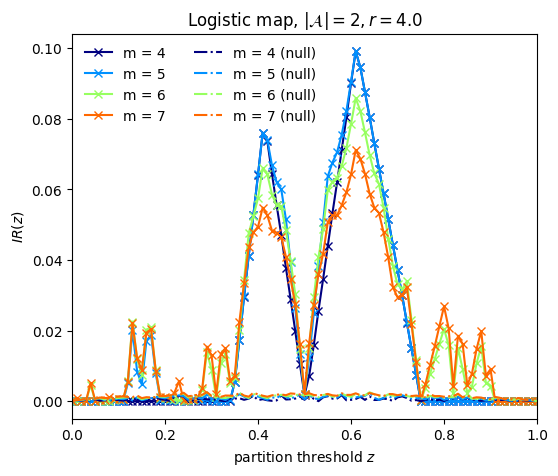

In [30]:
plt.figure(figsize=(6,5))

colors = plt.cm.jet(np.linspace(0, 0.8, num_m))
#colors = plt.cm.Reds(np.linspace(0, 0.8, num_m))
for my in range(num_m):
    plt.plot(threshold_vector, IR_original[:,my], color=colors[my],marker='x',linestyle='-',label=f"m = {m_vector[my]}")
for my in range(num_m):  
    plt.plot(threshold_vector, IR_null[:,my], color=colors[my],linestyle='-.',label=f"m = {m_vector[my]} (null)")
        #max_idx = np.argmax(chaotic_IR[my,:])
        #max_val = chaotic_IR[my,max_idx]
        #best_loc = range(1, m_max+1)[max_idx]
        #plt.text(best_loc, max_val, f'r = {mu_vector[my]:.2f}', va='bottom', ha='center', fontsize=10)
plt.xlabel('partition threshold $z$')
plt.ylabel('$IR(z)$')
plt.title('Logistic map, $|{\cal{A}}| = 2, r = 4.0$')
plt.legend(ncol=2,frameon=False)
plt.xlim(0,1)
#plt.xlim([1,m_max])
#plt.ylim([-0.01,0.20])
#xtick_pos = np.linspace(1, m_max, 6, dtype=int)
#xtick_labels = [str(x) for x in xtick_pos]
#plt.xticks(xtick_pos, xtick_labels)

# Illustrative figure on time irreversibility (Figure 1 paper)

We visualize four examples: periodic (reversible), periodic (irreversible), aperiodic (reversible), aperiodic (irreversible)

(-0.02, 1.02)

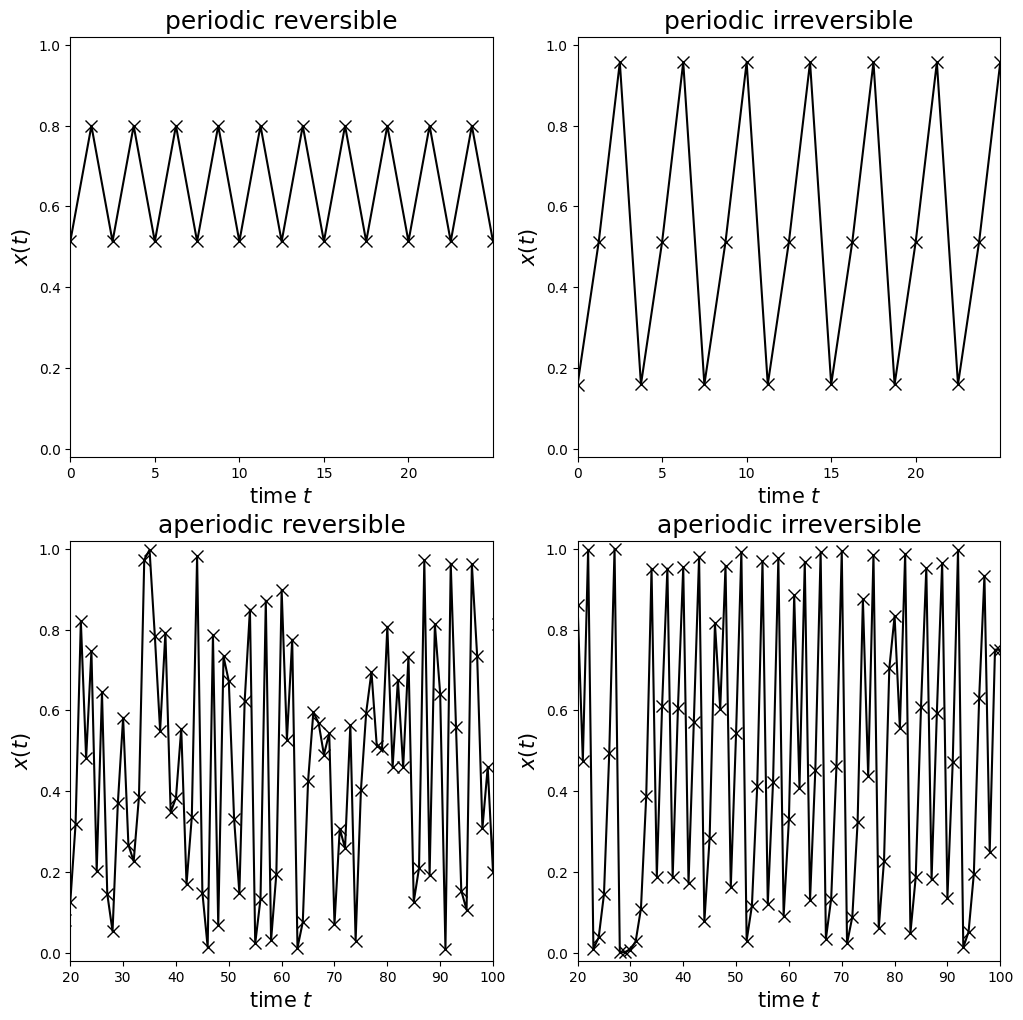

In [146]:
series_size = 200

serie1=[]
serie2=[]
serie3=[]
serie4=[]

x1 = 0.21
x2 = x1
x3 = x1
x4 = x1 

for i in range(series_size):
    
    x1=log4(3.2,x1)
    x2=log4(3.8284,x2)
    x3=np.random.random()
    x4=log4(4,x4)
    
    serie1.append(x1)
    serie2.append(x2)
    serie3.append(x3)
    serie4.append(x4)
    

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
colors = plt.cm.jet(np.linspace(0, 0.8, 4))

im_a = axs[0,0].plot(range(0,series_size), serie1,c='k',linestyle='-',marker='x',markersize=8)
axs[0,0].set_xlabel('time $t$',fontsize='15')
axs[0,0].set_ylabel('$x(t)$',fontsize='15')
axs[0,0].set_title('periodic reversible',fontsize='18')
axs[0,0].set_xlim(20,40)
axs[0,0].set_ylim(-0.02,1.02)
axs[0,0].set_xticks(range(20,40,4))
axs[0,0].set_xticklabels(['0', '5', '10', '15', '20'])
#axs[0,0].set_xlim(1500,1520)



im_b = axs[0,1].plot(range(0,series_size), serie2,c='k',linestyle='-',marker='x',markersize=8)
axs[0,1].set_xlabel('time $t$',fontsize='15')
axs[0,1].set_ylabel('$x(t)$',fontsize='15')
#axs[0].set_ylim(0,m_max-1)
axs[0,1].set_title('periodic irreversible',fontsize='18')
axs[0,1].set_xlim(20,40)
axs[0,1].set_ylim(-0.02,1.02)
axs[0,1].set_xticks(range(20,40,4))
axs[0,1].set_xticklabels(['0', '5', '10', '15', '20'])
#axs[0,1].set_xlim(1500,1550)
#axs[0].set_xticks(range(0,num_mu,10))
#axs[0].set_xticklabels(['3.5', '3.6', '3.7', '3.8', '3.9', '4'])
#axs[0].set_yticks(range(4,15,5))
#axs[0].set_yticklabels(['5', '10', '15'])
#plt.colorbar(im_c,ax=[axs[0]],shrink=0.93, aspect=20,label='$IR(r,m)$')


im_c = axs[1,0].plot(range(0,series_size), serie3,c='k',linestyle='-',marker='x',markersize=8)
axs[1,0].set_xlabel('time $t$',fontsize='15')
axs[1,0].set_ylabel('$x(t)$',fontsize='15')
#axs[0].set_ylim(0,m_max-1)
axs[1,0].set_title('aperiodic reversible',fontsize='18')
axs[1,0].set_xlim(20,100)
axs[1,0].set_ylim(-0.02,1.02)
#axs[1,0].set_xticks(range(20,100,4))
#axs[1,0].set_xticklabels(['0', '5', '10', '15', '20'])

#axs[0].set_xticks(range(0,num_mu,10))
#axs[0].set_xticklabels(['3.5', '3.6', '3.7', '3.8', '3.9', '4'])
#axs[0].set_yticks(range(4,15,5))
#axs[0].set_yticklabels(['5', '10', '15'])
#plt.colorbar(im_c,ax=[axs[0]],shrink=0.93, aspect=20,label='$IR(r,m)$')


im_d = axs[1,1].plot(range(0,series_size), serie4,c='k',linestyle='-',marker='x',markersize=8)
axs[1,1].set_xlabel('time $t$',fontsize='15')
axs[1,1].set_ylabel('$x(t)$',fontsize='15')
#axs[0].set_ylim(0,m_max-1)
axs[1,1].set_title('aperiodic irreversible',fontsize='18')
axs[1,1].set_xlim(20,100)
axs[1,1].set_ylim(-0.02,1.02)
#axs[1,1].set_xticks(range(20,40,4))
#axs[1,1].set_xticklabels(['0', '5', '10', '15', '20'])
#axs[0].set_yticks(range(4,15,5))
#axs[0].set_yticklabels(['5', '10', '15'])
#plt.colorbar(im_c,ax=[axs[0]],shrink=0.93, aspect=20,label='$IR(r,m)$')





# Irreversibility in the logistic map (Figure 3 paper)

We compare the measure of m-irreversibility in the logistic map for different values of the map parameter $r$, and fixing the number of symbols to 2. We measure irreversibility for the original signal, and for a null model of reshuffles, where we compute the mean and CI(95%) after 100 reshufflings

series size: 1000000
r= 4
partition [0,a]U[a,1], a= 0.5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


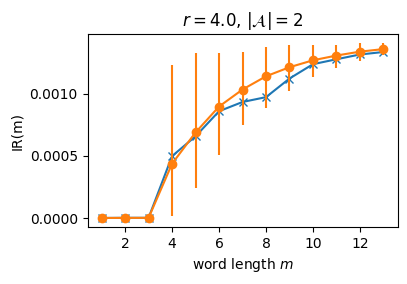

In [31]:
m_min=1
m_max=13
series_size=1000000
num_shuffles = 100
mu=4 # for logistic map x(t+1)=mu x(t)[1-x(t)]
threshold=0.5 # for partition [0,a]U[a,1], where a=threshold
print('series size:',series_size)
print('r=',mu)
print('partition [0,a]U[a,1], a=',threshold)


#DYNAMICS TO GENERATE (REAL-VALUED) TIME SERIES
def log4(mu,x):
    return mu*x*(1-x)

x=np.random.random()
L=[]
L.append(x)
for i in range(series_size):
    x=log4(mu,x)
    #x=np.random.random()
    L.append(x) #forward real_value time series
revL=L.copy()
revL.reverse() #backward real-valued time series


#SYMBOLIZATION
L_symb=[]
for i in range(series_size):
    if L[i]>threshold:
        L_symb.append(1)
    else:
        L_symb.append(0) 

revL_symb=L_symb.copy()
revL_symb.reverse() 

#FROM LIST TO STRING
L_symb_str = LIST2STR(L_symb)
revL_symb_str = LIST2STR(revL_symb)
    

#print('Example of forward and backward series (first ten values)')
#print('forward', L_symb_str[0:10])
#print('backward', revL_symb_str[0:10])

#COMPUTATION OF m-irrev for the actual series
IRR_vec=[]
binary_string1 = L_symb_str
binary_string2 = revL_symb_str
for m in range(m_min,m_max+1):
    blocks = count_blocks_two(binary_string1, binary_string2, m)
    dic1 = blocks[0]
    dic2 = blocks[1]
    IRR=0
    block_normalization = series_size - m + 1
    for i in dic1:
        IRR += (dic1[i]/block_normalization -dic2[i]/block_normalization)**2
    IRR_vec.append(np.sqrt(IRR))


#COMPUTATION OF m-irrev for the null model
#first I shuffle the fwd sequence (list)
IRR_vec_null = np.zeros((num_shuffles,m_max))

for sx in range(num_shuffles):
    print(sx)
    null_L_symb = random.sample(L_symb,len(L_symb))
    #I take the bwd sequence of that shuffled
    null_revL_symb = null_L_symb.copy()
    null_revL_symb.reverse()
    #I transform list to string
    null_L_symb_str=LIST2STR(null_L_symb)
    null_revL_symb_str=LIST2STR(null_revL_symb)
    #IRR_vec_null=[]
    binary_string1 = null_L_symb_str
    binary_string2 = null_revL_symb_str
    for m in range(m_min,m_max+1):
        blocks = count_blocks_two(binary_string1, binary_string2, m)
        dic1 = blocks[0]
        dic2 = blocks[1]
        IRR=0
        block_normalization = series_size - m + 1
        for i in dic1:
            IRR += (dic1[i]/block_normalization -dic2[i]/block_normalization)**2
        IRR_vec_null[sx,m-1] = np.sqrt(IRR)
        

        
# Compute the mean value of each realization.
IRR_vec_null_mean = np.mean(IRR_vec_null, axis=0)

percentile_3 = np.percentile(IRR_vec_null, 3, axis=0)
percentile_97 = np.percentile(IRR_vec_null, 97, axis=0)

# Now, we want to stack these two arrays into a 2D array of shape (2, m_max).
# We can do this with np.stack. We specify axis=0 to stack them vertically.

confidence_intervals = np.stack((percentile_3, percentile_97), axis=0)
error = [(IRR_vec_null_mean - confidence_intervals[0]),(confidence_intervals[1] - IRR_vec_null_mean)]

plt.figure(figsize=(4,2.5))

plt.plot([i for i in range(m_min, m_max + 1)], IRR_vec, '-x', label='signal')
plt.errorbar([i for i in range(m_min, m_max + 1)], IRR_vec_null_mean, yerr=error, fmt='-o', label='null model')
plt.xlabel('word length $m$')
plt.ylabel('IR(m)')
plt.title('$r = 4.0$, $|{\cal{A}}| = 2$')
#plt.legend(frameon=False)
plt.show()



